In [1]:
%run "libraries.ipynb"

common libraries loaded


# page selection

In [2]:
pages = codecs.open("data/pagenames.txt","r", "utf-8-sig").readlines()
pages = map(lambda x: x.strip(), pages)

In [40]:
page = "Circle"

## clickstream

In [41]:
with codecs.open("data/clickstream/{0}.json".format(page), "r", "utf-8-sig") as f:
  clickstreams = json.load(f)

In [42]:
# print(clickstreams)

df_clickstreams = pd.DataFrame(clickstreams["out"].items(), columns=["page", "out"]).set_index("page")

df_clickstreams = df_clickstreams.join(pd.DataFrame(clickstreams["in"].items(), columns=["page", "in"]).set_index("page"), how="outer", rsuffix="in")

df_clickstreams = df_clickstreams.fillna(0)

df_clickstreams = df_clickstreams.convert_objects(convert_numeric=True) 

df_clickstreams.head()

,out,in
page,,
360 (disambiguation),0,13
Acorn,0,11
Affine sphere,30,0
Alhazen,0,143
Angle,13,15


In [43]:
df_clickstreams["m"] = df_clickstreams.apply(lambda r: (float(r["out"]) + float(r["in"])) * 0.5, axis=1 )

df_clickstreams.head()

,out,in,m
page,,,
360 (disambiguation),0,13,6.5
Acorn,0,11,5.5
Affine sphere,30,0,15.0
Alhazen,0,143,71.5
Angle,13,15,14.0


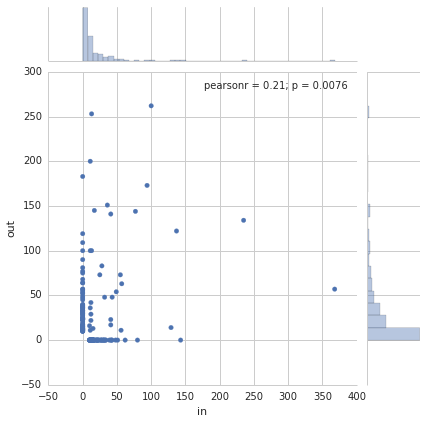

In [44]:
df = df_clickstreams.loc[[ i for i in df_clickstreams.index if "other-" not in i and i != "Main_Page"],:]

sns.jointplot(x="in", y="out", data=df);

## position

## position rank x clickstream out rank